In [35]:
import torch
import numpy as np
from torch.distributions import multinomial

In [2]:
# 标量
x = torch.tensor(1.0)

# 向量
y = torch.arange(4)

# 长度、维度、形状
y_len = len(y)
y_dim = y.shape
y_size = y.size()

print(x, y, y_len, y_dim, y_size)

tensor(1.) tensor([0, 1, 2, 3]) 4 torch.Size([4]) torch.Size([4])


In [3]:
# 张量
X = torch.arange(24).reshape(2, 3, 4)
print(X)

Y = X.clone()
print(Y + X)
print(Y * X)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])
tensor([[[ 0,  2,  4,  6],
         [ 8, 10, 12, 14],
         [16, 18, 20, 22]],

        [[24, 26, 28, 30],
         [32, 34, 36, 38],
         [40, 42, 44, 46]]])
tensor([[[  0,   1,   4,   9],
         [ 16,  25,  36,  49],
         [ 64,  81, 100, 121]],

        [[144, 169, 196, 225],
         [256, 289, 324, 361],
         [400, 441, 484, 529]]])


In [4]:
X.sum(axis=0) # 按行求和
X.numel() # 元素个数
print(X.sum(axis=0, keepdims=True)) # 保持维度
print(X.cumsum(axis=0)) # 每一行等于前面行的累加

tensor([[[12, 14, 16, 18],
         [20, 22, 24, 26],
         [28, 30, 32, 34]]])
tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 14, 16, 18],
         [20, 22, 24, 26],
         [28, 30, 32, 34]]])


In [5]:
x = torch.ones(4, dtype=torch.float32)
y = torch.tensor([2.0, 3, 4, 5])
# 点积
print(torch.dot(x, y))
print(torch.sum(x * y))
# 矩阵向量积
print(torch.mv(x.reshape(1, -1), y))
# 矩阵乘法
print(torch.mm(x.reshape(1, -1), y.reshape(-1, 1)))
# 矩阵按元素相乘是哈达玛积
# L2范数或矩阵的Frobenius范数
print(torch.norm(x))
# L1范数
print(torch.abs(x).sum())

tensor(14.)
tensor(14.)
tensor([14.])
tensor([[14.]])
tensor(2.)
tensor(4.)


In [6]:
# 可视化
%matplotlib inline
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def use_svg_display():  #@save
    # 用矢量图显示
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):    #@save
    use_svg_display()
    # 设置图的尺寸
    d2l.plt.rcParams['figure.figsize'] = figsize

#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    # 设置坐标轴
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    # 绘图
    if legend is None:
        legend = []
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    # 如果 `X` 有一个轴，输出 `True`
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list) and not hasattr(X[0], "__len__"))
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

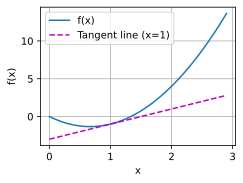

In [7]:
def f(x):
    return 3 * x ** 2 - 4 * x
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [8]:
x = torch.arange(4.0, requires_grad=True)
print(x)
y = 2 * torch.dot(x, x)
print(y)
y.backward()
print(x.grad)

tensor([0., 1., 2., 3.], requires_grad=True)
tensor(28., grad_fn=<MulBackward0>)
tensor([ 0.,  4.,  8., 12.])


In [9]:
# y是标量，求梯度直接调用backward
y = x.sum()
x.grad.zero_()
y.backward()
print(x.grad)

tensor([1., 1., 1., 1.])


In [10]:
# y是向量，求梯度得到的是一个矩阵，相当于是累计的y对x中的每一个梯度
y = x * x
x.grad.zero_()
print(y)
y.sum().backward()
# y.backward(torch.ones(len(x)))
print(x.grad)

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)
tensor([0., 2., 4., 6.])


In [11]:
# 分离计算
x.grad.zero_()
y = x * x
print(y)
u = y.detach() # 如果直接u = y，那么最后计算的梯度是 3 * x^2，而不是x
z = u * x
z.sum().backward()
print(x.grad)


tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)
tensor([0., 1., 4., 9.])


In [12]:
# 函数中有控制流，依然可以计算梯度
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else: 
        c = 100 * b
    return c
a = torch.tensor([1,2,3,4], dtype=torch.float32, requires_grad=True)
d = f(a)
d.sum().backward()

print(a.grad == (d / a))

tensor([True, True, True, True])


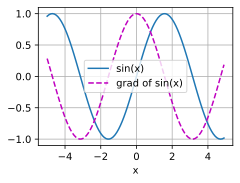

In [34]:
# sin(x)
x = torch.arange(-5, 5, 0.1, requires_grad=True)
#x.grad.zero_()
y = torch.sin(x)
y.sum().backward()
plot(x.detach().numpy(), [y.detach().numpy(), x.grad], xlabel='x', legend=['sin(x)', 'grad of sin(x)'])

In [82]:
fair_probs = torch.ones([6]) / 6
print(fair_probs)
counts = multinomial.Multinomial(100000, fair_probs).sample()
counts / 100000

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])


tensor([0.1673, 0.1678, 0.1665, 0.1647, 0.1664, 0.1673])

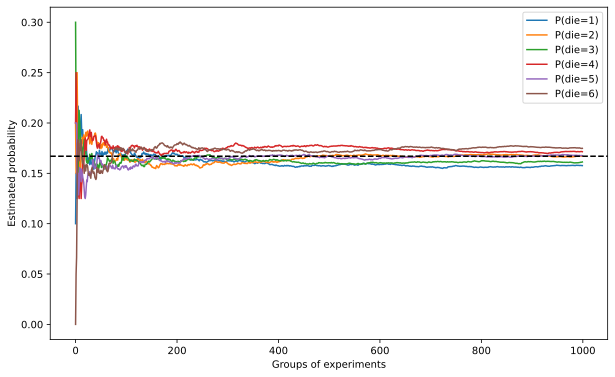

In [91]:
counts = multinomial.Multinomial(10, fair_probs).sample((1000,))
cum_counts = counts.cumsum(dim=0)

estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
d2l.set_figsize((10, 6))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

In [94]:
# help
print(dir(torch.distributions))
help(torch.distributions)

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weib